In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import mxnet as mx 

In [2]:
def decodeBox(yolobox, size, dscale):
    i, j, cx, cy, w, h = yolobox
    cxt = j*dscale + cx*dscale
    cyt = i*dscale + cy*dscale
    wt = w*size
    ht = h*size
    return [cxt, cyt, wt, ht]


def bboxdraw(img, label, dscale=32):
    CLASSES = {8:"vehicle", 4:"pedestrian", 2:"cyclist", 1:"traffic lights"}
    assert label.shape == (7,7,9)
    size = img.shape[1]
    ilist, jlist = np.where(label[:,:,0]==1)
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for i,j in zip(ilist, jlist): 
        cx,cy,w,h, cls1, cls2, cls3, cls20 = label[i,j,1:]
        print(cls1, cls2, cls3, cls20)
        cxt, cyt, wt ,ht = decodeBox([i, j, cx,cy,w,h], size, dscale)
        # Create a Rectangle patch
        rect = patches.Rectangle((cxt-wt/2,cyt-ht/2), wt,ht,linewidth=1,edgecolor='r',facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)
        print((int(cls1)<<3)+(int(cls2)<<2)+(int(cls3)<<1)+int(cls20))
        plt.gca().text(cxt-wt/2,cyt-ht/2,
                    '{:s} {:.3f}'.format(CLASSES[(int(cls1)<<3)+(int(cls2)<<2)+(int(cls3)<<1)+int(cls20)], 1.0),
                    bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=8, color='white')

    plt.show()

In [3]:
data = mx.io.ImageRecordIter(path_imgrec='train.rec',
                             data_shape=(3,224,224),
                             label_width=7*7*9, 
                             batch_size=1,)

In [5]:
num=200
data.reset()
for i in range(num):
    batch = data.next()

In [6]:
batch.data

[<NDArray 32x3x224x224 @cpu(0)>]

In [7]:
batch.label

[<NDArray 32x441 @cpu(0)>]

In [76]:
img = batch.data[0].asnumpy()[0]
label = batch.label[0].asnumpy().reshape((7,7,9))

(1.0, 0.0, 0.0, 0.0)
8
(1.0, 0.0, 0.0, 0.0)
8
(1.0, 0.0, 0.0, 0.0)
8
(1.0, 0.0, 0.0, 0.0)
8


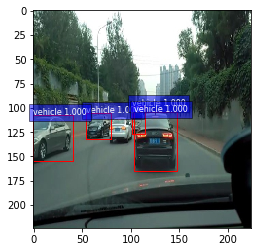

In [77]:
img4show = np.uint8(img.transpose((1,2,0)))
bboxdraw(img4show, label)